## K-Nearest Neighbors(KNN)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.300,3.900,1
1,2.500,6.300,0
2,5.700,3.900,1
3,6.100,6.200,0
4,7.400,3.400,1


## Exploratory Data Analysis and Visualization

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [3]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [5]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

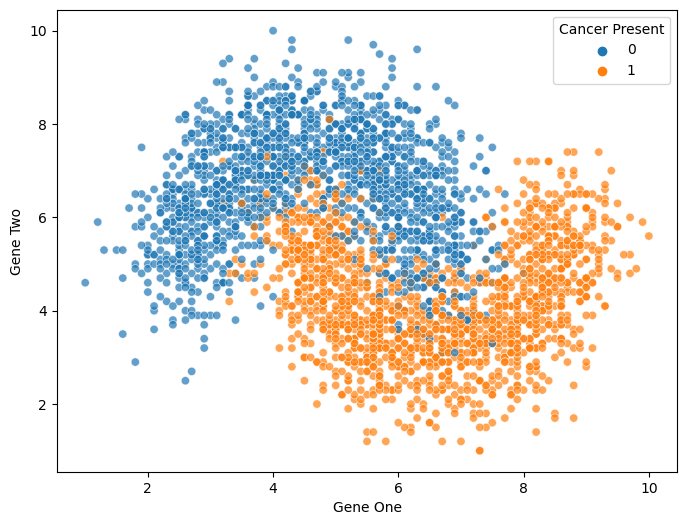

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

# KNN algoritmaları biribirinden ayrışık olan datalarda çok daha iyi sonuçlar verir. Biribirine grift olan datalarda ise 
# kötü sonuçlar verir. Mesela bu data özelinde en fazla hatayı boundry-sınır gözlemlerde yani birbirine grift olan yerlerde
# yapacaktır.

(4.0, 8.0)

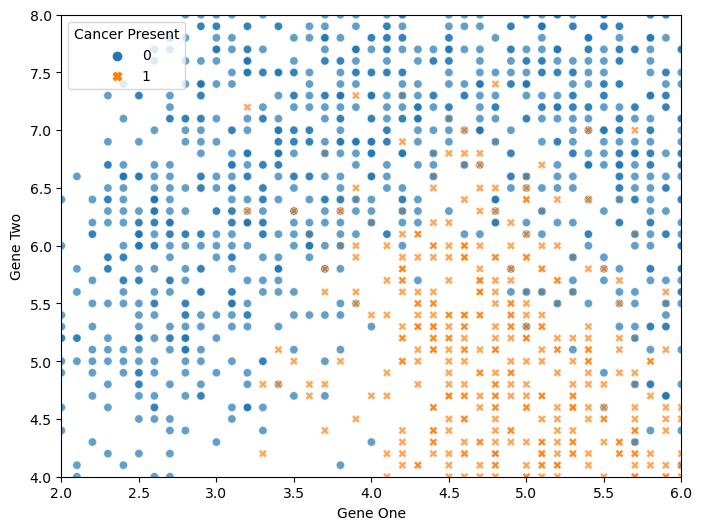

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

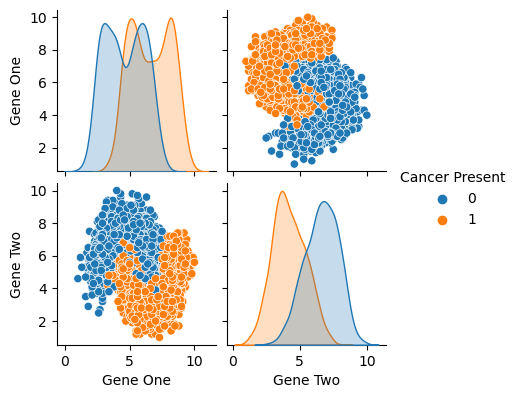

In [8]:
sns.pairplot(data=df, hue="Cancer Present", height=2, aspect =1)

# Gene one feature için 2 class nerdeyse %50 oranında birbirine grift gibi görünüyor.
# Gene two feature için 2 class nerdeyse %25 oranında birbirine grift gibi görünüyor.
# Gene two featurenının daha ayrıştırıcı bir feature (önemli bir feature) olduğunu söyleyebiliriz.

# Ancak 2 boyutlu görselleştirmeler bizi yanıltabilir. Burdan aldığımız insightları Boxplot üzerinden de teyit etmemiz
# gerekir.

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

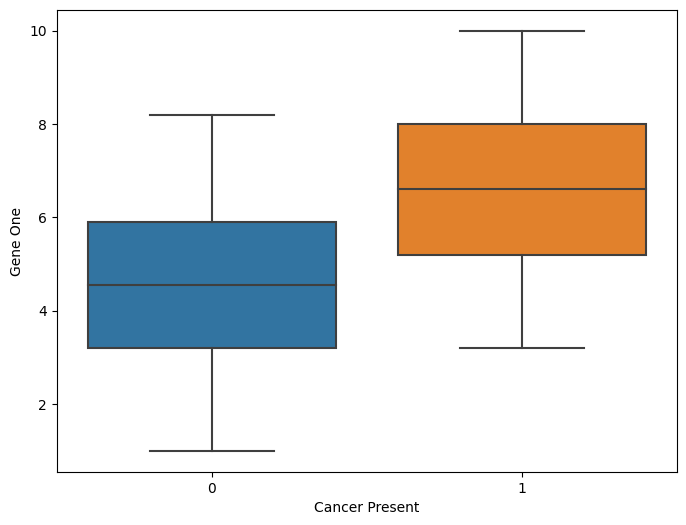

In [131]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df)

# Gene One büyüdükçe kanser olma riski artar.
# pairplottan aldığımız insghtları burdan da alabiliyoruz. Gene one özelinde 2 class Gene two'ya göre biribiryle daha fazla
# kesişiyor.

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

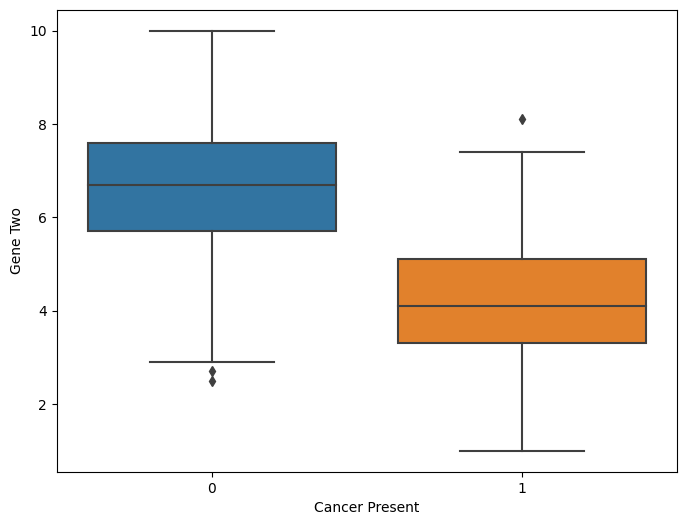

In [132]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df)

# Gene two küçüldükçe kanser olma riski artar.
# pairplottan aldığımız insghtları burdan da alabiliyoruz. Gene two özelinde 2 class Gene one'a göre biribiryle daha az
# kesişiyor.

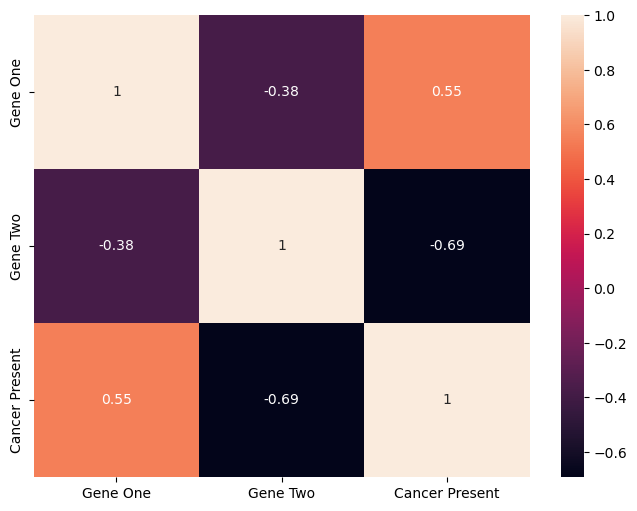

In [9]:
sns.heatmap(df.corr(), annot=True);

# Boxplotlardan çıkardığımız insghtları burda da görebiliyoruz.

## Train|Test Split and Scaling Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# KNN distance-mesafe tabanlı bir model olduğundan datayı mutlaka scale etmeliyiz.
# Bu datamızda her 2 class'ta 1-10 arasında değer almış. Datanın kendisi scale ihtiyaç duymuyor aslında. Bu gibi durumlarda
# data hem scallenmeden hem de scallenerek sonuçlar kontrol edilir. Hangisi daha iyi sonuç veriyorsa onunla devam edilir.

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [19]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [20]:
y_pred_proba = pipe_model.predict_proba(X_test)
 
# Eğer weights=uniform ise tüm komşulara eşit ağırlık verilir. weights=distance ise yakın olan komşulara daha fazla ağırlık
# verilirken uzakta olan komşulara daha az ağırlık verilir.

# model arka planda belirlediğimiz komşu sayısı ve weights hyper-parametrelerine göre hangi sınıfa ait olma olasılığı 
# tespit eder.

In [21]:
pd.DataFrame(y_pred_proba)

# modelimizde weights= uniform ve komşu sayısı 5 olduğundan 895. gözlemin etrafındaki 5 komşudan 3'ü 1 classına (0.6) aitken
# 2'si 0 classına (0.4) aitmiş. Bu sebeple 0.6 olasılıkla 1 classına atamasını yapacak.

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [27]:
210**0.5

14.491376746189438

In [23]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [31]:
pd.DataFrame.from_dict(my_dict).sample(10)

# Gerçek class, tahmin edilen class, 1 classına ait olma olasılığı ve 0 classına ait olma olasılıklarını gösteren df.

,Actual,Pred,Proba_1,Proba_0
1005,1,1,0.800,0.200
2901,0,0,0.000,1.000
2847,0,0,0.000,1.000
637,0,0,0.000,1.000
869,1,1,1.000,0.000
1491,0,0,0.000,1.000
2234,0,1,0.600,0.400
2527,0,0,0.000,1.000
1569,1,1,1.000,0.000
100,1,1,0.800,0.200


## Model Performance on Classification Tasks

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [67]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

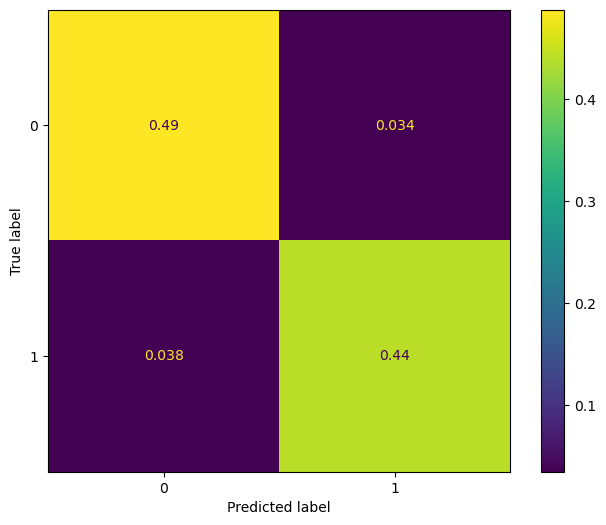

In [34]:

ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Elbow Method for Choosing Reasonable K Values

In [37]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [41]:
test_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

# Optimum K değerini seçmek için öncelikle datamız dengeli ise accuracy metricini, dengesiz ise hedef classımızın recall
# metriğini kullanabiliriz.

# Her komşu sayısı(1-30 arasında) için önce accuracy scorunu bulup daha sonra bu scoru 1'den çıkararak her K değeri için
# error scorumuzu buluyoruz.

# ÇOK ÖNEMLİ NOT: test datasında (hold out set) üzerinden bulacağımız en optimum K değeri data leakage sorununa neden 
# olabileceğinden train datamızı CV'da verip burdaki validation setinin ortalama error scorlarına göre karar vereceğiz.

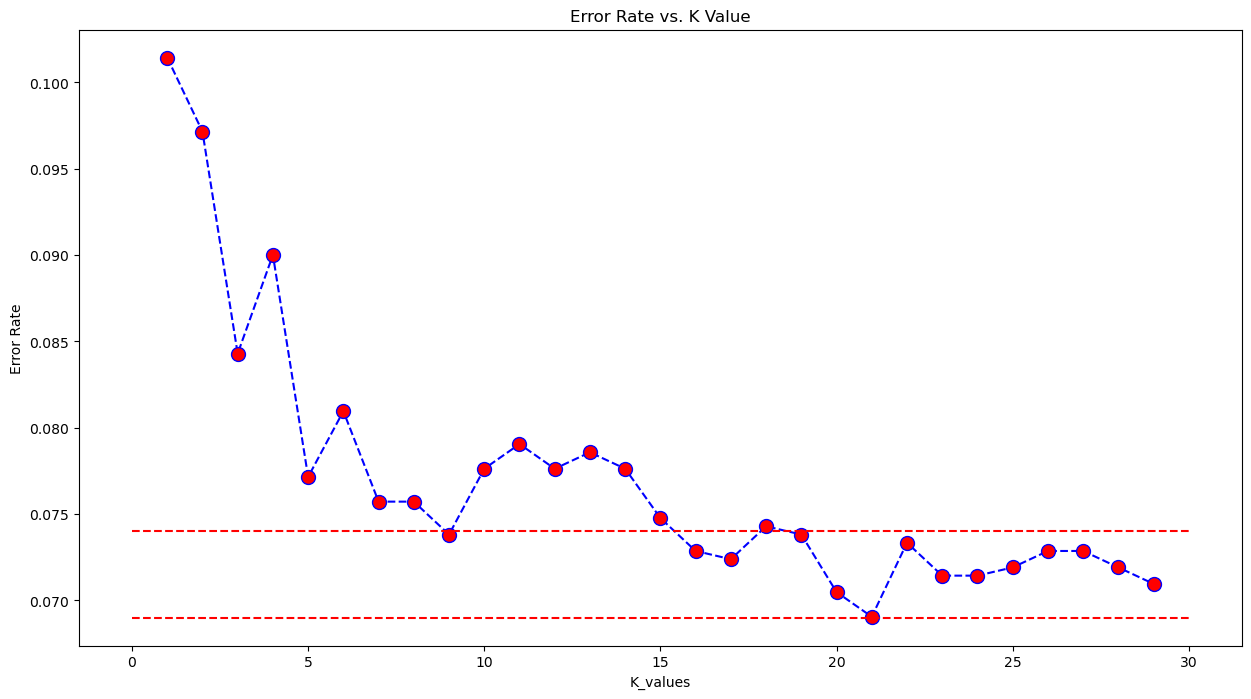

In [39]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Bulduğumuz error scorlarını görselleştiriyoruz.

## Overfiting and underfiting control for k values

In [40]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

# Yukarıda yaptığımız işlemin aynısını CV'da verdiğimiz train datası üzerinden elde ettiğimiz validation ve train datalarının
# ortalama error hatalarını karşılaştırıyoruz. Böylece overiftingi daha rahat görebileceğiz.

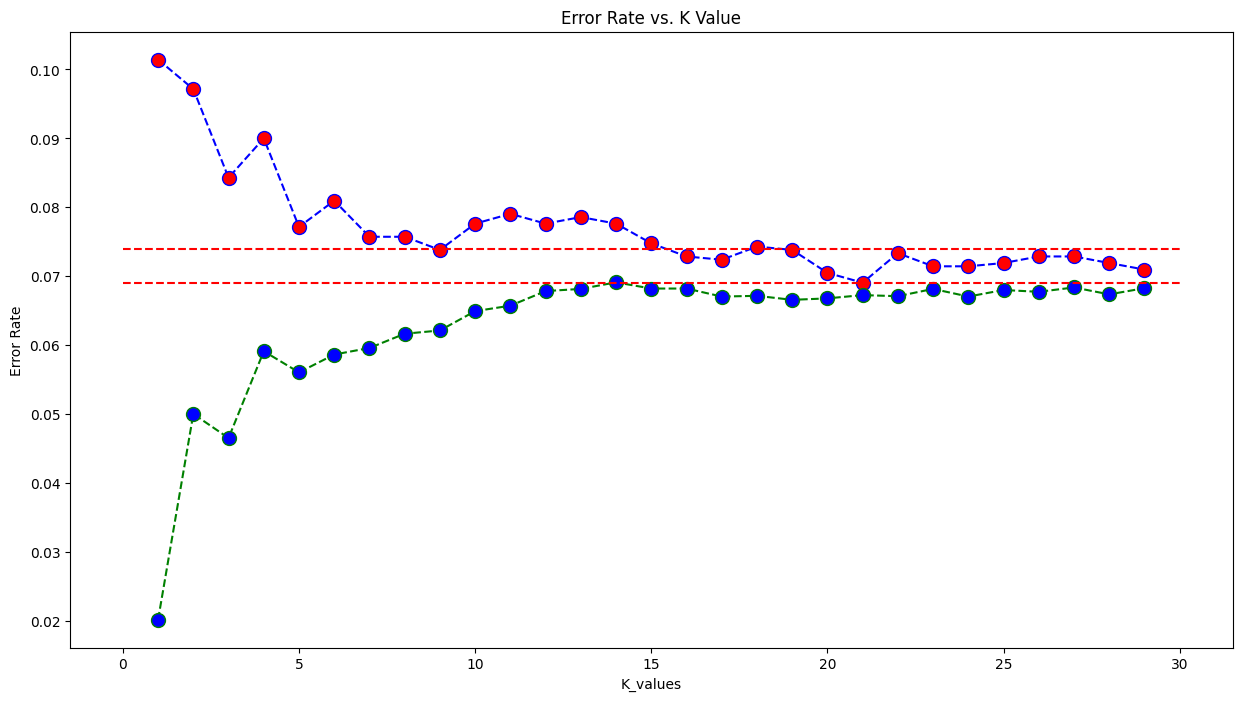

In [154]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Kırmızılar validation datası, maviler train datasına ait scorlar.
# val. datası için en düşük error scoru K=21'de alınmış ancak eğer 21'i seçersek modelin kompleksitisi yani çalışma maliyeti
# çok artacaktır. K= 9 için error 0.074 iken K=21 için error 0.069 dur. Aradaki 0.005'lik bir fark için bu kadar kompleksitiyi
# yani çalışma maliyetini göze almaya değer mi? Cevabını aradığımız soru budur. 
# 0.005'lik bir fark için bu kadar maaliyeti göze almaya değmez.

# K=21'de scorlar hem validation hem de train datasındaki error scorları nerdeyse aynı. Ancak K=9 'da ise validation datasının
# error scoru 0.074 iken train datasının error scoru 0.060'dır. Aradaki fark 0.014'dür. Yani fark çok az olduğundan K=9'u 
# gönül rahatlığı ile seçebiliriz.

## Scores by Various K Values

In [42]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

# Yukarıda aldığımız skorlar ile burdaki skorlar aynı çıkmasa bile yakın değerler çıkmasını bekliyoruz.

WITH K=1

Test_Set
[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set
[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [43]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
knn21 = Pipeline(steps=operations)

knn21.fit(X_train, y_train)
print('WITH K=21\n')
eval_metric(knn21, X_train, y_train, X_test, y_test)

WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [44]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn9, X_train, y_train, X_test, y_test)

WITH K=9

Test_Set
[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Cross Validate For Optimal K Value

In [45]:
from sklearn.model_selection import cross_val_score, cross_validate

In [46]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.926
train_accuracy    0.938
test_precision    0.926
train_precision   0.937
test_recall       0.931
train_recall      0.942
test_f1           0.928
train_f1          0.939
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)
k_values= range(1,30)
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

# KNN için en önemli olan hyper_parametrelerimiz:
# 1. n_neighbors (binary modellerde classlar arasında eşitlik olmaması için tek sayı olmasına dikkat edilmelidir. Multiclass
#                 datalarda tek veya çift olması farketmez.)
# 2. weights
# 3. p'dir.

In [49]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True,)

In [50]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True)

In [51]:
knn_grid_model.best_estimator_
# GridsearchCV herzaman en düşük error scorunu verecek olan maximum metric 
# scorunu döndürür. GridsearchCV sonrası bulacağımız n_neighbors sayısı 
# çok maaliyetli olabileceğinden elbow metoduyla seçmek best practicedir.

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [165]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.930952
mean_train_score    0.932751
Name: 82, dtype: object

In [52]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [53]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

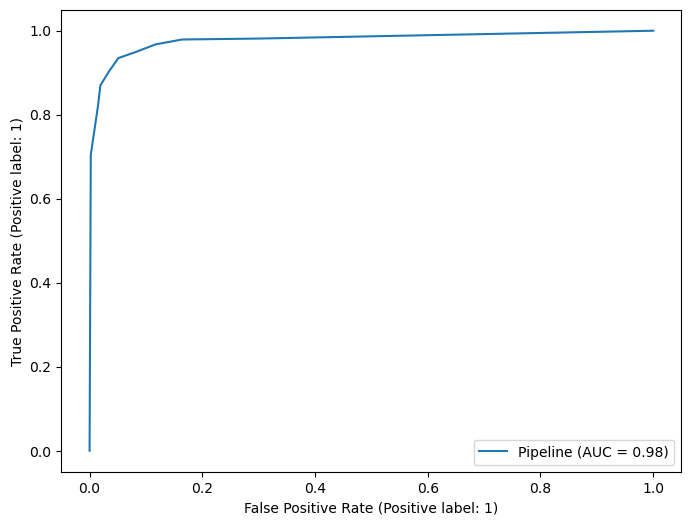

In [54]:
RocCurveDisplay.from_estimator(knn9, X_test, y_test)

In [55]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

## Final Model and Model Deployment

In [56]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [57]:
import pickle

In [58]:
pickle.dump(final_model, open('knn_final_model', 'wb'))

## Predict New Observations

In [59]:
loaded_model = pickle.load(open('knn_final_model', 'rb'))

In [60]:
X.describe()

,Gene One,Gene Two
count,3000.000,3000.000
mean,5.600,5.410
std,1.828,1.729
min,1.000,1.000
25%,4.300,4.000
50%,5.600,5.400
75%,6.900,6.700
max,10.000,10.000


In [61]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [62]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.000,1.000
1,3.000,4.000
2,4.300,4.000
3,5.600,5.500
4,7.000,6.700
5,9.500,10.000
6,2.000,8.000
7,6.000,1.000


In [63]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [64]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.000,1.000,0,0.000,1.000
1,3.000,4.000,0,0.111,0.889
2,4.300,4.000,1,1.000,0.000
3,5.600,5.500,0,0.222,0.778
4,7.000,6.700,0,0.000,1.000
5,9.500,10.000,1,0.667,0.333
6,2.000,8.000,0,0.000,1.000
7,6.000,1.000,1,1.000,0.000


In [65]:
pip install --upgrade pandas

     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.3 MB 1.3 MB/s eta 0:00:09
      --------------------------------------- 0.2/11.3 MB 1.5 MB/s eta 0:00:08
     - -------------------------------------- 0.3/11.3 MB 1.8 MB/s eta 0:00:07
     - -------------------------------------- 0.4/11.3 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/11.3 MB 2.0 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/11.3 MB 2.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/11.3 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/11.3 MB 2.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.2/11.3 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/11.3 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/11.3 MB 3.0 MB/s